# Random Systems : Card Trick Case 1&2



## Nneka Maureen Okolo

## 29/12/2018


In [1]:
import numpy as np

import itertools

import random

import collections

import matplotlib.pyplot as plt

# Analysis:

#### We want to check the probability of a Magician winning by:

#### * Performing a Riffle Shuffle three times then selecting a random card and replacing it in the shuffled deck
#### * Randomly placing a random card in an ordered deck and performing a Riffle Shuffle three times


# Tools

#### * Define a function to compute the number of rising sequences in an array

In [2]:
def Rising_Seq(Array):
    
    #Parameters
    N = len(Array)                                   #The length of the array
    C = []                                           #Initialise a list to collect the ordered sequences
    count = 0                                        #Initialise a count of the number of rising sequences
    
    #1. Create a for loop to go over each element of the array
    for i in range(N):
        CardI = Array[i]+1                           #for a Card number in the array comput CardI = Card number + 1
        j = i
        if Array[i] not in C:                        #Check that Card number is not already in the list
            C.append(Array[i])
            while CardI in Array[j+1:N] and j<N:     #Check that CardI is after the Card number in the array then append
                C.append(CardI)
                if CardI in Array:
                    j = list(Array).index(CardI)     #Obtain the position of CardI
                else:
                    j = N
                CardI+=1                             #With reference to the position of CardI compute the next Card number
            count += 1                               #Count after a sequence has been recorded
            
    #Result = print('Number of Rising Sequences: ',count,'\n\nRising Sequences:\n',C)
    return count                                     #Return the count which is the number of rising sequences.

#### * Define a function to compute N riffle shuffles of an array

In [3]:
#Define a riffle shuffle

def Riffle_Shuffle(Array, N):
    
    #Parameters
    NT = len(Array)                                  #The length of the array
    NS = N                                           #Number of required Riffle shuffles on the array
    i = 0                                            #Initialise the number of Riffle shuffles
    
    
    #1. Create a while loop to run a riffle shuffle on the same array.
    while i < NS:
        
        if NT%2 == 0:                                #If the length of the array is even
            cut = NT//2                              #Divide the array into two equal parts
            A = Array[0:cut]                         #Assign the first half of the array to A
            B = Array[cut: NT]                       #Assign the second half of the array to B
            E = np.random.randint(0,2)               #Include randomness to reduce the likeliness of the top or
                                                     #bottom cards being in the same position
            if E == 0:
                Array = np.empty((A.size + B.size,), dtype=int)
                Array[0::2] = A
                Array[1::2] = B
            if E == 1:
                Array = np.empty((A.size + B.size,), dtype=int)
                Array[1::2] = A
                Array[0::2] = B
                
        if NT%2 == 1:                                #If the length of the array is odd
            cut = NT//2 + 1                          #Divide the array into two unequal parts
            E = np.random.randint(0,2)               #Include randomness to reduce the likeliness of the top or bottom
                                                     #unequal Cards being in the same position
                
            if E == 0:
                A = Array[0:cut]                     #Assign the larger half of the array to A
                B = Array[cut: NT]                   #Assign the smaller half of the array to B
                Array = np.empty((A.size + B.size,), dtype=int)
                Array[0::2] = A
                Array[1::2] = B 
            if E == 1:
                A = Array[0:cut-1]                   #Assign the smaller half of the array to A
                B = Array[cut-1: NT]                 #Assign the larger half of the array to B
                Array = np.empty((A.size + B.size,), dtype=int)
                Array[0::2] = B
                Array[1::2] = A
        i+=1                                         #increase the counter till NS Riffle Shuffles are complete
        
    return Array                                     #Return the shuffled array                                    

#### * Define a function to compute the possible placements of a card

In [4]:
def Possible_Card_Placement(card,Array):

    j = list(Array).index(card)                          #Obtain the position of the selected card in the ordered deck

    Possible_Cards_Replace = []                          #Initialise a list to compute the number of possible positions
                                                         #of the card
        
    Cards_Replace = np.empty(N, dtype = int)             #Initialise the set for the location of the card at the first
                                                         #position  
        
    #Assign parts of the set with the selected card at the top position.
    Cards_Replace[0] = Array[j]
    Cards_Replace[1:j+1] = Array[0:j]
    Cards_Replace[j+1:N] = Array[j+1:N]

    #Add the first set to the list
    Possible_Cards_Replace.append(Cards_Replace)

    for i in range(1,N):
    
        Cards_Replace1 = np.empty(N, dtype = int)         #Initialise the set for the position of the card across 52-1
                                                          #possible positions
        
        #Assign parts of the set with respect to the possible position of the now top card
        Cards_Replace1[0:i] = Cards_Replace[1:i+1]
        Cards_Replace1[i] = Cards_Replace[0]
        Cards_Replace1[i+1:N] = Cards_Replace[i+1:N]
    
        #Add the possibilities to the list
        Possible_Cards_Replace.append(Cards_Replace1)
    
    return Possible_Cards_Replace

#### * Define the Deck of cards

In [5]:
#Parameters

N = int(input('Number of cards in a deck: '))           #Number of Cards in a Deck
Cards = np.arange(1,N+1)                                #Initialise a deck with N cards

Number of cards in a deck: 52


In [6]:
#To obtain all Permutations of the deck of Cards

#Cards_Iterations = list(itertools.permutations(Cards))
#Cards_Iterations

## Case 1:

#### Performing a Riffle Shuffle three times then selecting a random card and replacing it in the shuffled deck

### Step 1:
#### Perform a Riffle Shuffle three times on an ordered deck of 52 cards

In [7]:
Cards_Shuffle = Riffle_Shuffle(Cards,3)
print('Shuffled Deck: \n\n',Cards_Shuffle)

Shuffled Deck: 

 [ 7 27 20 40 34  1 47 14  8 28 21 41 35  2 48 15  9 29 22 42 36  3 49 16 10
 30 23 43 37  4 50 17 11 31 24 44 38  5 51 18 12 32 25 45 39  6 52 19 13 33
 26 46]


#### * Check that the number of rising sequences is 8

In [8]:
n = Rising_Seq(Cards_Shuffle)
print('Number of Rising Sequences in the Shuffled Deck: ',n)

Number of Rising Sequences in the Shuffled Deck:  8


### Step 2

#### Select a card say #15 and replace it randomly in the shuffled deck:

### Assumption:

#### The magician is not looking

In [9]:
Selected_card = 20
Possible_Cards_Replace = Possible_Card_Placement(Selected_card,Cards_Shuffle)
#Possible_Cards_Replace

### Step 3

#### Check that the number of rising sequences in each replacement is at most r+1 = 9

In [10]:
#Initialise a set of the number of rising sequences for each array in Possible_Cards_Replace
RSEQ = np.arange(N)
    
#Create a for loop to compute the number of rising sequences in each array of Possible_Cards_Replace
for i in range(N):
    RSEQ[i] = Rising_Seq(Possible_Cards_Replace[i])
print('Number of Rising Sequences for each possible position of Card #{}:\n\n{}'.format(Selected_card,RSEQ))    

Number of Rising Sequences for each possible position of Card #20:

[8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 8 8 8 8 8]


### Step 4

#### Determine the probability of the magician wining with this technique i.e the probability of obtaining exactly 9 rising sequences

In [11]:
#Count the number of occurences of 8 and 9
Count = collections.Counter(RSEQ)               
#Count

#Compute the probability of obtaining 9 rising sequences
Probability = Count[9]/N                                 #P = (Number of outcomes)/(Number of possible outcomes)       
print('Probability of a Magician winning for any possible positions of Card #{} is {}'.format(Selected_card,Probability))

Probability of a Magician winning for any possible positions of Card #20 is 0.7115384615384616


## Case 1 Simulation

#### Determine the range of probabilities of a Magician winning a round with **any** card picked and replaced randomly in the shuffled deck Cards_Shuffle

In [12]:
Collective_Probability = []

for card in Cards_Shuffle:
    
    Possible_Cards_Replace1 = Possible_Card_Placement(card,Cards_Shuffle)
    
    #Initialise a set of the number of rising sequences for each array in Possible_Cards_Replace
    RSEQ1 = np.arange(N)                        
    
    #Create a for loop to compute the number of rising sequences in each array of Possible_Cards_Replace
    for i in range(N):
        RSEQ1[i] = Rising_Seq(Possible_Cards_Replace1[i])
    
    #Count the number of occurences of 8 and 9
    Count1 = collections.Counter(RSEQ1)               
    
    Probability1 = Count1[9]/N                        #Compute the probability of obtaining 9 rising sequences
                                                #P = (Number of outcomes)/(Number of possible outcomes)
    Collective_Probability.append(Probability1)
    
#Collective_Probability

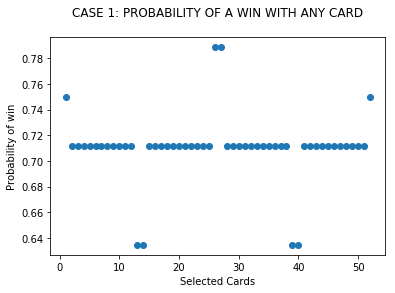

In [13]:
plt.plot(Cards_Shuffle,Collective_Probability,'o')
plt.title('CASE 1: PROBABILITY OF A WIN WITH ANY CARD\n')
plt.xlabel('Selected Cards')
plt.ylabel('Probability of win')
plt.show()

## Observation

#### * It is observed from Steps 1-4 that the probability of a magician finding the selected card #15 is 0.711.

#### * From the Case 1 Simulation and previous trials, it observed that the probability of a Magician winning this round for any deck selected and replaced in the shuffled deck is in the range [0.55,0.80]


# Case 2

#### Randomly placing a random card in an ordered deck and performing a Riffle Shuffle three times

### Step 1

#### Randomly pick a card and replace it in the ordered deck of cards:

### Assumption

#### The magician is not looking

#### Assume card #20 was picked

In [14]:
Selected_card1 = 20
Possible_Cards_Replace2 = Possible_Card_Placement(Selected_card1,Cards)
#Possible_Cards_Replace2

### Step 2

#### Perform a Riffle Shuffle on the deck of cards for each possible position

In [15]:
Card_Shuffle2 = []
for i in range(N):
    Card_Shuffle2.append(Riffle_Shuffle(Possible_Cards_Replace2[i],3))

#Card_Shuffle2

### Step 3

#### Check that the number of rising sequences in the 3-Riffle Shuffle is at most 9

In [16]:
#Initialise a set of the number of rising sequences for each array in Card_Shuffle2
RSEQ2 = np.arange(N)                                

#Create a for loop to compute the number of rising sequences in each array of Card_Shuffle2
for i in range(N):
    RSEQ2[i] = Rising_Seq(Card_Shuffle2[i])
print('Number of Rising Sequences for each possible position of Card #{}:\n\n{}'.format(Selected_card1,RSEQ2))    

Number of Rising Sequences for each possible position of Card #20:

[8 9 9 9 9 9 9 8 9 9 9 9 9 8 9 9 9 9 9 8 9 9 9 9 9 8 9 9 9 9 9 8 8 9 9 9 9
 9 8 9 9 9 9 9 9 8 9 9 9 9 9 9]


### Step 4

#### Determine the Probability of the magician winning using this method

In [17]:
#Count the number of times 8 and 9 occur
Count2 = collections.Counter(RSEQ2) 
#Count2

#Compute the probability of obtaining 9 rising sequences
Probability2 = Count2[9]/N                                #P = (Number of outcomes)/(Number of possible outcomes)                                               
print('Probability of a Magician winning for any possible positions of Card #{} is {}'.format(Selected_card1,Probability2))

Probability of a Magician winning for any possible positions of Card #20 is 0.8269230769230769


## Case 2 Simulation

#### Determine the range of probabilities of a Magician winning **a round** with **any** card picked and replaced randomly in the shuffled deck Cards_Shuffle

In [18]:
Collective_Probability2 = []

for card in Cards:
    
    Possible_Cards_Replace3 = Possible_Card_Placement(card,Cards)
    
    Card_Shuffle3 = []
    for i in range(N):
        Card_Shuffle3.append(Riffle_Shuffle(Possible_Cards_Replace3[i],3))

    #Initialise a set of the number of rising sequences for each array in Card_Shuffle2
    RSEQ3 = np.arange(N)                           
    
    #Create a for loop to compute the number of rising sequences in each array of Possible_Cards_Replace
    for i in range(N):
        RSEQ3[i] = Rising_Seq(Card_Shuffle3[i])
    
    #Count the number of occurences of 8 and 9
    Count3 = collections.Counter(RSEQ3)               
    
    Probability3 = Count3[9]/N                        #Compute the probability of obtaining 9 rising sequences
                                                      #P = (Number of outcomes)/(Number of possible outcomes)
    Collective_Probability2.append(Probability3)
    
#Collective_Probability2

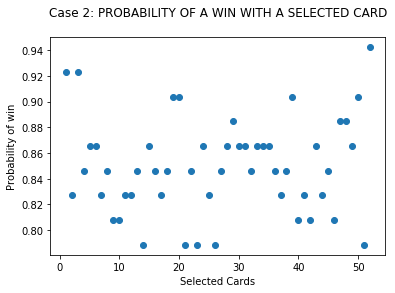

In [19]:
plt.plot(Cards,Collective_Probability2,'o')
plt.title('Case 2: PROBABILITY OF A WIN WITH A SELECTED CARD\n')
plt.xlabel('Selected Cards')
plt.ylabel('Probability of win')
plt.show()

## Observation:

#### It is observed that:

#### * It is observed from Steps 1-4 that the probability of a magician finding the selected card #20 is 0.78.

#### * From a partcicular round of the Case 2 Simulation, we observe that the probability of a Magician to win the round is in the range [0.77,0.97].

#### These outcomes are higher than those observed in Case 1

### Note:

#### * The computer simulations for the random interleave is not totally random as the only case considered here is when there is a single card in between two cards.

#### * For each card selected in the Case 2 Simulation, the shuffle is not the same.

## Interlude

#### Before we conclude, it is useful to determine if the 9 rising sequences observed from each test is good enough for a magician to guess the card chosen

#### That is, if the 9 rising sequences composes of eight rising sequences of at least two cards and a single rising sequence. For this, we will consider from each case 5 possibilities whose rising sequences are 9.

#### Redefine the Rising Sequence function to give relevant output

In [20]:
def Rising_Seq(Array):
    
    #Parameters
    N = len(Array)                                   #The length of the array
    C = []                                           #Initialise a list to collect the ordered sequences
    count = 0                                        #Initialise a count of the number of rising sequences
    
    #1. Create a for loop to go over each element of the array
    for i in range(N):
        CardI = Array[i]+1                           #for a Card number in the array comput CardI = Card number + 1
        j = i
        if Array[i] not in C:                        #Check that Card number is not already in the list
            C.append(Array[i])
            while CardI in Array[j+1:N] and j<N:     #Check that CardI is after the Card number in the array then append
                C.append(CardI)
                if CardI in Array:
                    j = list(Array).index(CardI)     #Obtain the position of CardI
                else:
                    j = N
                CardI+=1                             #With reference to the position of CardI compute the next Card number
            count += 1                               #Count after a sequence has been recorded
            
    Result = print('Number of Rising Sequences: ',count,'\n\nRising Sequences:\n',C)
                
    return Result                                    #Return the count and rising sequences.

## Test 1:

#### Recall the selected card in **Step 1**, **Case 1**

In [21]:
Possible_Cards_Replace[20:25]

[array([ 7, 27, 40, 34,  1, 47, 14,  8, 28, 21, 41, 35,  2, 48, 15,  9, 29,
        22, 42, 36, 20,  3, 49, 16, 10, 30, 23, 43, 37,  4, 50, 17, 11, 31,
        24, 44, 38,  5, 51, 18, 12, 32, 25, 45, 39,  6, 52, 19, 13, 33, 26,
        46]),
 array([ 7, 27, 40, 34,  1, 47, 14,  8, 28, 21, 41, 35,  2, 48, 15,  9, 29,
        22, 42, 36,  3, 20, 49, 16, 10, 30, 23, 43, 37,  4, 50, 17, 11, 31,
        24, 44, 38,  5, 51, 18, 12, 32, 25, 45, 39,  6, 52, 19, 13, 33, 26,
        46]),
 array([ 7, 27, 40, 34,  1, 47, 14,  8, 28, 21, 41, 35,  2, 48, 15,  9, 29,
        22, 42, 36,  3, 49, 20, 16, 10, 30, 23, 43, 37,  4, 50, 17, 11, 31,
        24, 44, 38,  5, 51, 18, 12, 32, 25, 45, 39,  6, 52, 19, 13, 33, 26,
        46]),
 array([ 7, 27, 40, 34,  1, 47, 14,  8, 28, 21, 41, 35,  2, 48, 15,  9, 29,
        22, 42, 36,  3, 49, 16, 20, 10, 30, 23, 43, 37,  4, 50, 17, 11, 31,
        24, 44, 38,  5, 51, 18, 12, 32, 25, 45, 39,  6, 52, 19, 13, 33, 26,
        46]),
 array([ 7, 27, 40, 34,  1, 47, 

#### Analyse the Rising Sequences in each case

In [22]:
for i in range(5):
    Rising_Seq(Possible_Cards_Replace[20+i])

Number of Rising Sequences:  9 

Rising Sequences:
 [7, 8, 9, 10, 11, 12, 13, 27, 28, 29, 30, 31, 32, 33, 40, 41, 42, 43, 44, 45, 46, 34, 35, 36, 37, 38, 39, 1, 2, 3, 4, 5, 6, 47, 48, 49, 50, 51, 52, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 20]
Number of Rising Sequences:  9 

Rising Sequences:
 [7, 8, 9, 10, 11, 12, 13, 27, 28, 29, 30, 31, 32, 33, 40, 41, 42, 43, 44, 45, 46, 34, 35, 36, 37, 38, 39, 1, 2, 3, 4, 5, 6, 47, 48, 49, 50, 51, 52, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 20]
Number of Rising Sequences:  9 

Rising Sequences:
 [7, 8, 9, 10, 11, 12, 13, 27, 28, 29, 30, 31, 32, 33, 40, 41, 42, 43, 44, 45, 46, 34, 35, 36, 37, 38, 39, 1, 2, 3, 4, 5, 6, 47, 48, 49, 50, 51, 52, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 20]
Number of Rising Sequences:  9 

Rising Sequences:
 [7, 8, 9, 10, 11, 12, 13, 27, 28, 29, 30, 31, 32, 33, 40, 41, 42, 43, 44, 45, 46, 34, 35, 36, 37, 38, 39, 1, 2, 3, 4, 5, 6, 47, 48, 49, 50, 51, 52, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 

## Observation

#### Notice that in this case, in each array there is a single rising sequence so it clear which is the selected card.

### NOTE

#### This is not always the case

## Test 2

#### Recall the selected card in **Step 1**, **Case 2**

In [25]:
Card_Shuffle2[2:7]

[array([27,  6, 40, 19,  1, 34, 13, 47, 28,  7, 41, 21,  2, 35, 14, 48, 29,
         8, 42, 22, 20, 36, 15, 49, 30,  9, 43, 23,  3, 37, 16, 50, 31, 10,
        44, 24,  4, 38, 17, 51, 32, 11, 45, 25,  5, 39, 18, 52, 33, 12, 46,
        26]),
 array([19, 40,  6, 27, 47, 13, 34,  1, 21, 41,  7, 28, 48, 14, 35,  2, 22,
        42,  8, 29, 49, 15, 36,  3, 23, 43,  9, 30, 50, 16, 37, 20, 24, 44,
        10, 31, 51, 17, 38,  4, 25, 45, 11, 32, 52, 18, 39,  5, 26, 46, 12,
        33]),
 array([ 6, 27, 19, 40, 34,  1, 47, 13,  7, 28, 21, 41, 35,  2, 48, 14,  8,
        29, 22, 42, 36,  3, 49, 15,  9, 30, 23, 43, 37,  4, 50, 16, 10, 31,
        24, 44, 38, 20, 51, 17, 11, 32, 25, 45, 39,  5, 52, 18, 12, 33, 26,
        46]),
 array([13, 46,  1, 33, 40, 21, 27,  7, 14, 47,  2, 34, 41, 22, 28,  8, 15,
        48,  3, 35, 42, 23, 29,  9, 16, 49,  4, 36, 43, 24, 30, 10, 17, 50,
         5, 37, 44, 25, 31, 11, 18, 51, 20, 38, 45, 26, 32, 12, 19, 52,  6,
        39]),
 array([ 1, 33, 13, 46, 27,  7, 

#### Analyse the Rising sequences

In [27]:
for i in range(5):
    Rising_Seq(Card_Shuffle2[2+i])

Number of Rising Sequences:  9 

Rising Sequences:
 [27, 28, 29, 30, 31, 32, 33, 6, 7, 8, 9, 10, 11, 12, 40, 41, 42, 43, 44, 45, 46, 19, 20, 1, 2, 3, 4, 5, 34, 35, 36, 37, 38, 39, 13, 14, 15, 16, 17, 18, 47, 48, 49, 50, 51, 52, 21, 22, 23, 24, 25, 26]
Number of Rising Sequences:  9 

Rising Sequences:
 [19, 20, 40, 41, 42, 43, 44, 45, 46, 6, 7, 8, 9, 10, 11, 12, 27, 28, 29, 30, 31, 32, 33, 47, 48, 49, 50, 51, 52, 13, 14, 15, 16, 17, 18, 34, 35, 36, 37, 38, 39, 1, 2, 3, 4, 5, 21, 22, 23, 24, 25, 26]
Number of Rising Sequences:  9 

Rising Sequences:
 [6, 7, 8, 9, 10, 11, 12, 27, 28, 29, 30, 31, 32, 33, 19, 20, 40, 41, 42, 43, 44, 45, 46, 34, 35, 36, 37, 38, 39, 1, 2, 3, 4, 5, 47, 48, 49, 50, 51, 52, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 25, 26]
Number of Rising Sequences:  9 

Rising Sequences:
 [13, 14, 15, 16, 17, 18, 19, 46, 47, 48, 49, 50, 51, 52, 1, 2, 3, 4, 5, 6, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 7, 8, 9, 10, 11, 

## Observation

#### Notice that in some arrays there are at least two rising sequences so it may not be easy to correctly determine which card was selected from the ordered deck.

# Conclusion

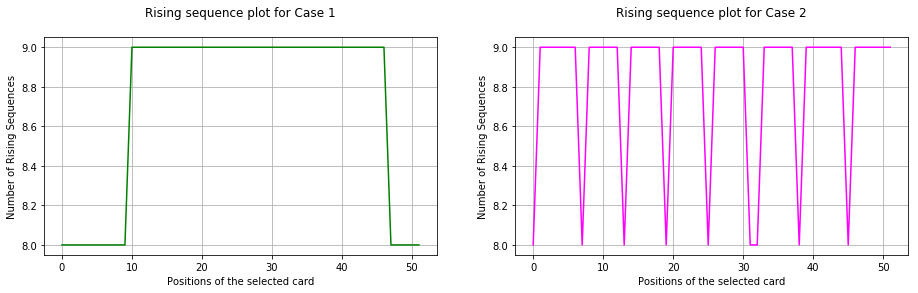

In [28]:
plt.subplot(1,2,1)
plt.plot(RSEQ,'green')
plt.xlabel('Positions of the selected card')
plt.ylabel('Number of Rising Sequences')
plt.title('Rising sequence plot for Case 1\n')
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(RSEQ2, 'magenta')
plt.xlabel('Positions of the selected card')
plt.ylabel('Number of Rising Sequences')
plt.title('Rising sequence plot for Case 2\n')
plt.grid(True)
plt.subplots_adjust(left=0.5,right=2.5)
plt.show()

#### From the Observations recorded in the report and with Test 1 and 2, although the method shown in Case 1 has lower probability of obtaining 9 rising sequences, hence a lower probability for a Magician to win, it is easier to determine the selected card from the shuffled deck than with the method illustrated in Case 2 which has a higher probability of obtaining 9 rising sequences.

### Note
#### There are cases when no conclusion can be made from either method.


### Thanks for reading